In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
u1 = np.array([3.0, 3.0])
u2 = np.array([2.0, 2.0])

X = np.array([
    [5.1, 3.5],
    [4.9, 3.0],
    [5.8, 2.7],
    [6.0, 3.0],
    [6.7, 3.1],
    [4.5, 2.3],
    [6.1, 2.8],
    [5.2, 3.2],
    [5.5, 2.6],
    [5.0, 2.0],
    [8.0, 0.5],
    [7.5, 0.8],
    [8.1, -0.1],
    [2.5, 3.5],
    [1.0, 3.0],
    [4.5, -1.0],
    [3.0, -0.5],
    [5.1, -0.2],
    [6.0, -1.5],
    [3.5, -0.1],
    [4.0, 0.0],
    [6.1, 0.5],
    [5.4, -0.5],
    [5.3, 0.3],
    [5.8, 0.6]
])


In [ ]:
print("u1:", u1)
print("u2:", u2)
print("Matrix X:\n", X)


u1: [3. 3.]
u2: [2. 2.]
Matrix X:
 [[ 5.1  3.5]
 [ 4.9  3. ]
 [ 5.8  2.7]
 [ 6.   3. ]
 [ 6.7  3.1]
 [ 4.5  2.3]
 [ 6.1  2.8]
 [ 5.2  3.2]
 [ 5.5  2.6]
 [ 5.   2. ]
 [ 8.   0.5]
 [ 7.5  0.8]
 [ 8.1 -0.1]
 [ 2.5  3.5]
 [ 1.   3. ]
 [ 4.5 -1. ]
 [ 3.  -0.5]
 [ 5.1 -0.2]
 [ 6.  -1.5]
 [ 3.5 -0.1]
 [ 4.   0. ]
 [ 6.1  0.5]
 [ 5.4 -0.5]
 [ 5.3  0.3]
 [ 5.8  0.6]]


In [ ]:
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

In [ ]:
def assign_to_centroids(data_points, centroids):
    assignments = []
    for point in data_points:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        closest_centroid = np.argmin(distances)
        assignments.append(closest_centroid)
    return assignments

In [ ]:
centroids = [u1, u2]
assignments = assign_to_centroids(X, centroids)

In [ ]:
for i, point in enumerate(X):
    print(f"Data point {point} is assigned to centroid {assignments[i] + 1}")

Data point [5.1 3.5] is assigned to centroid 1
Data point [4.9 3. ] is assigned to centroid 1
Data point [5.8 2.7] is assigned to centroid 1
Data point [6. 3.] is assigned to centroid 1
Data point [6.7 3.1] is assigned to centroid 1
Data point [4.5 2.3] is assigned to centroid 1
Data point [6.1 2.8] is assigned to centroid 1
Data point [5.2 3.2] is assigned to centroid 1
Data point [5.5 2.6] is assigned to centroid 1
Data point [5. 2.] is assigned to centroid 1
Data point [8.  0.5] is assigned to centroid 1
Data point [7.5 0.8] is assigned to centroid 1
Data point [ 8.1 -0.1] is assigned to centroid 1
Data point [2.5 3.5] is assigned to centroid 1
Data point [1. 3.] is assigned to centroid 2
Data point [ 4.5 -1. ] is assigned to centroid 2
Data point [ 3.  -0.5] is assigned to centroid 2
Data point [ 5.1 -0.2] is assigned to centroid 2
Data point [ 6.  -1.5] is assigned to centroid 2
Data point [ 3.5 -0.1] is assigned to centroid 2
Data point [4. 0.] is assigned to centroid 2
Data poin

In [ ]:
def update_centroids(data_points, assignments, k):
    new_centroids = []
    for i in range(k):
        assigned_points = data_points[np.array(assignments) == i]
        new_centroid = np.mean(assigned_points, axis=0) if len(assigned_points) > 0 else np.zeros_like(data_points[0])
        new_centroids.append(new_centroid)
    return new_centroids


In [ ]:
new_centroids = update_centroids(X, assignments, len(centroids))


In [ ]:
print("\nNew centroids after the first update:")
for i, centroid in enumerate(new_centroids):
    print(f"Centroid {i + 1}: {centroid}")


New centroids after the first update:
Centroid 1: [5.77058824 2.01764706]
Centroid 2: [ 4.0625 -0.1   ]


In [ ]:
def check_convergence(old_centroids, new_centroids, threshold=1e-4):
    distances = [euclidean_distance(old, new) for old, new in zip(old_centroids, new_centroids)]
    return all(distance < threshold for distance in distances)

In [ ]:
def k_means(data_points, centroids, max_iterations=100, threshold=1e-4):
    iteration = 0
    while iteration < max_iterations:
        assignments = assign_to_centroids(data_points, centroids)

        new_centroids = update_centroids(data_points, assignments, len(centroids))

        if check_convergence(centroids, new_centroids, threshold):
            print(f"Converged at iteration {iteration + 1}")
            break

        centroids = new_centroids
        iteration += 1

    return centroids, assignments

In [ ]:

u1 = np.array([3.0, 3.0])
u2 = np.array([2.0, 2.0])


centroids = [u1, u2]

max_iterations = 100

In [ ]:
final_centroids, final_assignments = k_means(X, centroids)

Converged at iteration 3


In [ ]:
print("\nFinal centroids after convergence:")
for i, centroid in enumerate(final_centroids):
    print(f"Centroid {i + 1}: {centroid}")

print("\nFinal assignments after convergence:")
for i, point in enumerate(X):
    print(f"Data point {point} is assigned to centroid {final_assignments[i] + 1}")


Final centroids after convergence:
Centroid 1: [5.8   2.125]
Centroid 2: [ 4.2        -0.05555556]

Final assignments after convergence:
Data point [5.1 3.5] is assigned to centroid 1
Data point [4.9 3. ] is assigned to centroid 1
Data point [5.8 2.7] is assigned to centroid 1
Data point [6. 3.] is assigned to centroid 1
Data point [6.7 3.1] is assigned to centroid 1
Data point [4.5 2.3] is assigned to centroid 1
Data point [6.1 2.8] is assigned to centroid 1
Data point [5.2 3.2] is assigned to centroid 1
Data point [5.5 2.6] is assigned to centroid 1
Data point [5. 2.] is assigned to centroid 1
Data point [8.  0.5] is assigned to centroid 1
Data point [7.5 0.8] is assigned to centroid 1
Data point [ 8.1 -0.1] is assigned to centroid 1
Data point [2.5 3.5] is assigned to centroid 1
Data point [1. 3.] is assigned to centroid 2
Data point [ 4.5 -1. ] is assigned to centroid 2
Data point [ 3.  -0.5] is assigned to centroid 2
Data point [ 5.1 -0.2] is assigned to centroid 2
Data point [ 6

In [ ]:


def plot_clusters(data_points, centroids, assignments, title):
    plt.figure(figsize=(8, 6))
    for i in range(len(centroids)):
        cluster_points = data_points[np.array(assignments) == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {i+1}")

    centroids = np.array(centroids)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', label="Centroids", s=100)

    plt.title(title)
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.legend()
    plt.grid(True)
    plt.show()



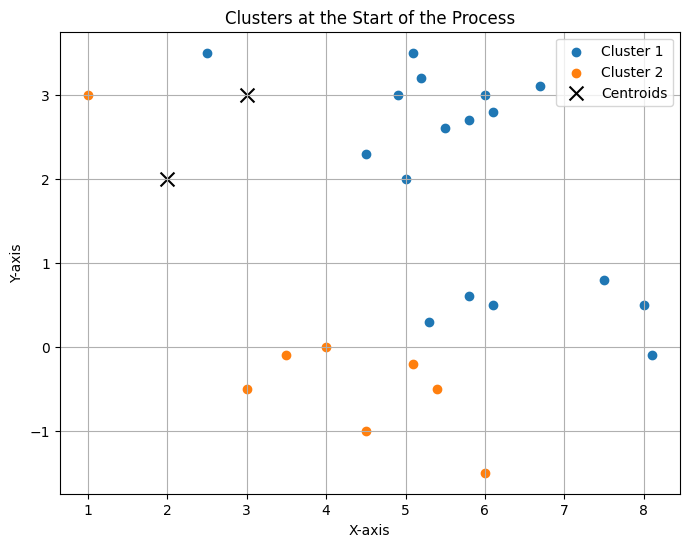

In [ ]:
initial_centroids = [u1, u2]
initial_assignments = assign_to_centroids(X, initial_centroids)
plot_clusters(X, initial_centroids, initial_assignments, "Clusters at the Start of the Process")



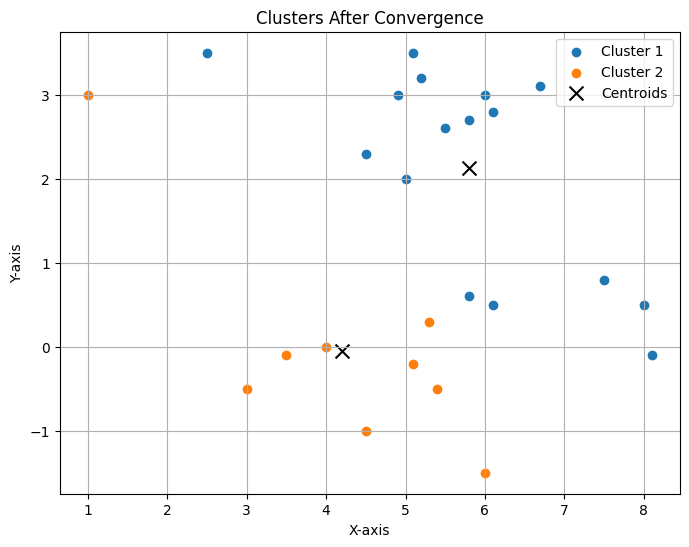

In [ ]:
plot_clusters(X, final_centroids, final_assignments, "Clusters After Convergence")


In [ ]:
def random_initialization(data_points, k):
    random_indices = np.random.choice(len(data_points), size=k, replace=False)
    return data_points[random_indices]

In [ ]:

random_centroids = random_initialization(X, 2)
assig = assign_to_centroids(X, random_centroids)



In [ ]:
final_centroids_random, final_assignments_random = k_means(X, random_centroids)

Converged at iteration 2


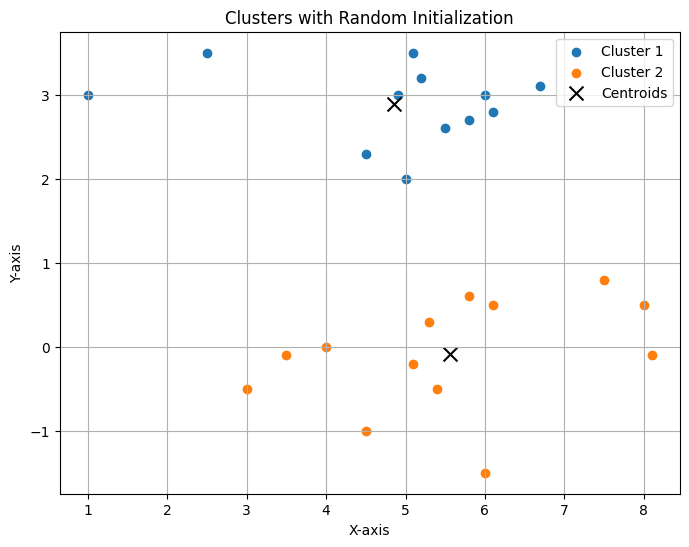

In [ ]:
plot_clusters(X, final_centroids_random, final_assignments_random, "Clusters with Random Initialization")


In [ ]:
def dist(X, centroids, assignments):
    inertia = 0
    for i in range(len(centroids)):
        cluster_points = X[np.array(assignments) == i]
        inertia += np.sum(np.linalg.norm(cluster_points - centroids[i], axis=1) ** 2)
    return inertia

In [ ]:
a1 = dist(X,  final_centroids_random, final_assignments_random)
a2 = dist(X, random_centroids, assig)
a3 = dist(X,final_centroids, final_assignments)
a4 = dist(X,centroids, assignments)


In [ ]:
print("Final after convergence sum of square using random")
print(a1)

print("Sum of square using random")
print(a2)

print("Final after convergence sum of square using initial")
print(a3)

print("sum of square using initial")
print(a4)


Final after convergence sum of square using random
67.15833333333333
Sum of square using random
94.08999999999999
Final after convergence sum of square using initial
83.67222222222222
sum of square using initial
301.75


In [ ]:
class K_Means:

    def __init__(self, k=2, tolerance = 0.001, max_iter = 500):
        self.k = k
        self.max_iterations = max_iter
        self.tolerance = tolerance

    def euclidean_distance(self, point1, point2):
        #return math.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2 + (point1[2]-point2[2])**2)   #sqrt((x1-x2)^2 + (y1-y2)^2)
        return np.linalg.norm(point1-point2, axis=0)

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

    def fit(self, data):
        self.centroids = {}
        for i in range(self.k):
            self.centroids[i] = data[i]


        for i in range(self.max_iterations):
            self.classes = {}
            for j in range(self.k):
                self.classes[j] = []

            for point in data:
                distances = []
                for index in self.centroids:
                    distances.append(self.euclidean_distance(point,self.centroids[index]))
                cluster_index = distances.index(min(distances))
                self.classes[cluster_index].append(point)

            previous = dict(self.centroids)
            for cluster_index in self.classes:
                self.centroids[cluster_index] = np.average(self.classes[cluster_index], axis = 0)



            isOptimal = True

            for centroid in self.centroids:
                original_centroid = previous[centroid]
                curr = self.centroids[centroid]
                if np.sum((curr - original_centroid)/original_centroid * 100.0) > self.tolerance:
                    isOptimal = False
            if isOptimal:
                break


In [ ]:

X = np.array([
    [5.1, 3.5],
    [4.9, 3.0],
    [5.8, 2.7],
    [6.0, 3.0],
    [6.7, 3.1],
    [4.5, 2.3],
    [6.1, 2.8],
    [5.2, 3.2],
    [5.5, 2.6],
    [5.0, 2.0],
    [8.0, 0.5],
    [7.5, 0.8],
    [8.1, -0.1],
    [2.5, 3.5],
    [1.0, 3.0],
    [4.5, -1.0],
    [3.0, -0.5],
    [5.1, -0.2],
    [6.0, -1.5],
    [3.5, -0.1],
    [4.0, 0.0],
    [6.1, 0.5],
    [5.4, -0.5],
    [5.3, 0.3],
    [5.8, 0.6]
])


In [ ]:
class K_Means:
    def __init__(self, k, data):
        self.k = k
        self.data = data
        self.centroids = None

    def initialise_centroids(self):
        initial_centroids = np.random.permutation(self.data.shape[0])[:self.k]
        self.centroids = self.data[initial_centroids]

    def fit(self):
        m = np.shape(self.data)[0]
        cluster_assignments = np.zeros((m, 2))  # Column 0: Cluster index, Column 1: Distance

        self.initialise_centroids()
        cents = self.centroids.copy()

        changed = True
        num_iter = 0

        while changed and num_iter < 100:
            changed = False

            for i in range(m):
                min_dist = np.inf
                min_index = -1
                for j in range(self.k):
                    dist_ji = euclidean_distance(cents[j, :], self.data[i, :])
                    if dist_ji < min_dist:
                        min_dist = dist_ji
                        min_index = j

                if cluster_assignments[i, 0] != min_index:
                    changed = True

                cluster_assignments[i, :] = min_index, min_dist ** 2

            for cent in range(self.k):
                points = self.data[np.nonzero(cluster_assignments[:, 0] == cent)[0]]
                if len(points) > 0:
                    cents[cent, :] = np.mean(points, axis=0)

            num_iter += 1

        return cents, cluster_assignments, num_iter


In [ ]:
def elbow_method(X, max_k=10):
    costs = []

    for k in range(1, max_k + 1):
        kmeans = K_Means(k=k, data=X)
        centroids, cluster_assignments, _ = kmeans.fit()

        wcss = np.sum(cluster_assignments[:, 1])
        costs.append(wcss)

    plt.plot(range(1, max_k + 1), costs)
    plt.title("Elbow Curve")
    plt.xlabel("K (Number of Clusters)")
    plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
    plt.grid(True)
    plt.show()

    return costs

In [ ]:
def plot_clusters(X, centroids, cluster_assignments):
    plt.scatter(X[:, 0], X[:, 1], c=cluster_assignments[:, 0], cmap='viridis', marker='o', s=100)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label="Centroids")
    plt.title(f"K-Means Clustering (K={len(centroids)})")
    plt.legend()
    plt.show()

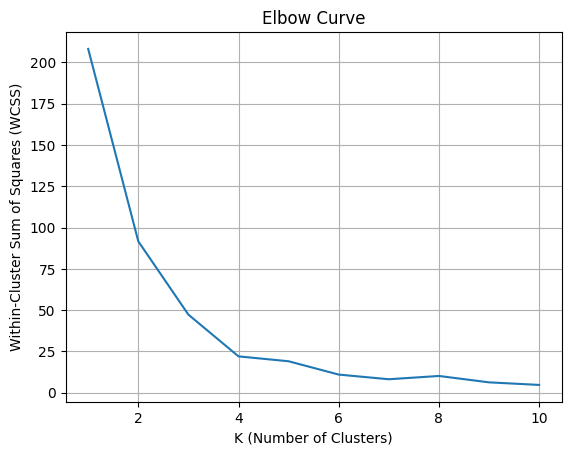

In [ ]:
costs = elbow_method(X, max_k=10)


In [ ]:
optimal_k = 4


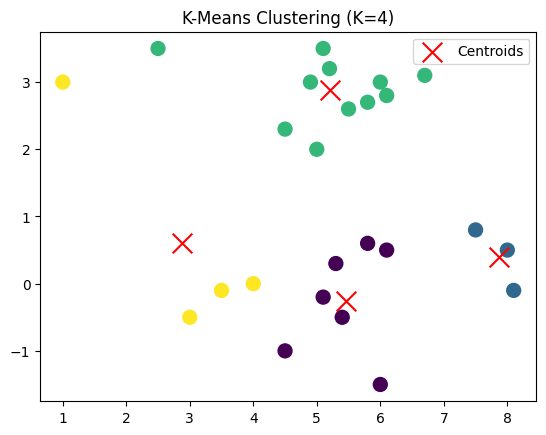

In [ ]:
kmeans = K_Means(k=optimal_k, data=X)
centroids, cluster_assignments, _ = kmeans.fit()
plot_clusters(X, centroids, cluster_assignments)


In [ ]:
print(centroids)
print(cluster_assignments)

[[ 5.45714286 -0.25714286]
 [ 7.86666667  0.4       ]
 [ 5.20909091  2.88181818]
 [ 2.875       0.6       ]]
[[2.         0.39404959]
 [2.         0.10950413]
 [2.         0.3822314 ]
 [2.         0.63950413]
 [2.         2.27041322]
 [2.         0.84132231]
 [2.         0.80041322]
 [2.         0.10132231]
 [2.         0.16404959]
 [2.         0.82132231]
 [1.         0.02777778]
 [1.         0.29444444]
 [1.         0.30444444]
 [2.         7.72132231]
 [3.         9.275625  ]
 [0.         1.46795918]
 [3.         1.225625  ]
 [0.         0.13081633]
 [0.         1.83938776]
 [3.         0.880625  ]
 [3.         1.625625  ]
 [0.         0.98653061]
 [0.         0.0622449 ]
 [0.         0.33510204]
 [0.         0.8522449 ]]


In [ ]:
a0=0
a1=0
a2=0
a3=0
for i in range(len(cluster_assignments)):
    if cluster_assignments[i][0]==0:
        a0+=cluster_assignments[i][1]
    if cluster_assignments[i][0]==1:
        a1+=cluster_assignments[i][1]
    if cluster_assignments[i][0]==0:
        a2+=cluster_assignments[i][1]
    if cluster_assignments[i][0]==0:
        a3+=cluster_assignments[i][1]

In [ ]:
print(a0,a1,a2,a3)

5.6742857142857135 0.6266666666666667 5.6742857142857135 5.6742857142857135


In [ ]:
print(a0+a1+a2+a3)

17.649523809523807
